In [5]:
!pip install nltk

In [6]:
#necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

Mounting Google drive to access the dataset


In [7]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#load train data
train_data = pd.read_csv('/content/drive/MyDrive/fake_news_data/train.csv')

In [11]:
#load testing data
test_data = pd.read_csv('/content/drive/MyDrive/fake_news_data/test.csv')

In [12]:
#EDA
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [13]:
# check for null values in the training dataset
train_data.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [14]:
# replacing the null values with empty string
train_data = train_data.fillna(' ')
test_data = test_data.fillna(' ')

In [15]:
# merging the author name and news title
train_data['content'] = train_data['author']+' '+train_data['title']
test_data['content'] = test_data['author']+' '+test_data['title']

In [16]:
print(train_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [17]:
print(test_data['content'])

0       David Streitfeld Specter of Trump Loosens Tong...
1         Russian warships ready to strike terrorists ...
2       Common Dreams #NoDAPL: Native American Leaders...
3       Daniel Victor Tim Tebow Will Attempt Another C...
4       Truth Broadcast Network Keiser Report: Meme Wa...
                              ...                        
5195    Jody Rosen The Bangladeshi Traffic Jam That Ne...
5196    Sheryl Gay Stolberg John Kasich Signs One Abor...
5197    Mike McPhate California Today: What, Exactly, ...
5198      300 US Marines To Be Deployed To Russian Bor...
5199    Teddy Wayne Awkward Sex, Onscreen and Off - Th...
Name: content, Length: 5200, dtype: object


In [18]:
# Display the count of each label
print(train_data['label'].value_counts())

1    10413
0    10387
Name: label, dtype: int64


In [19]:
print(train_data['label'].dtype)


int64


In [20]:
train_data['label'] = train_data['label'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       20800 non-null  int64 
 1   title    20800 non-null  object
 2   author   20800 non-null  object
 3   text     20800 non-null  object
 4   label    20800 non-null  int64 
 5   content  20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB
None


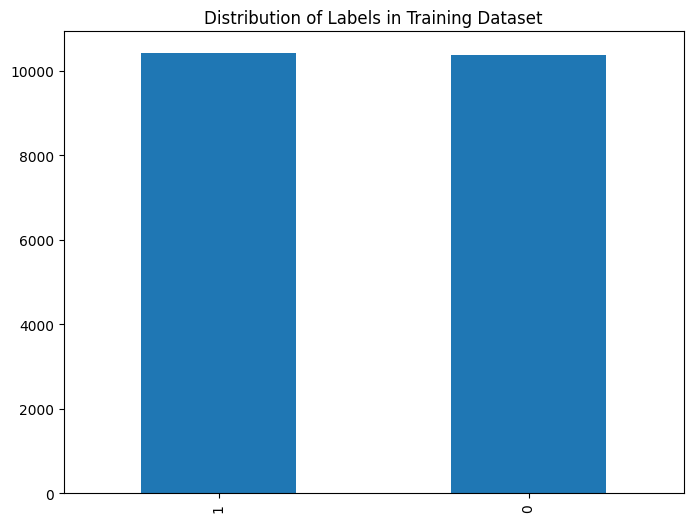

In [21]:
# display information after handling null values
print(train_data.info())

plt.figure(figsize=(8, 6))
train_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Training Dataset')
plt.show()



## Stemming

In [22]:
# implement stemming for the training dataset
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(content):
    text = re.sub('[^a-zA-Z]', ' ', content)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

train_data['content'] = train_data['content'].apply(preprocess_text)
test_data['content'] = test_data['content'].apply(preprocess_text)


In [23]:
#separating the data and label
X = train_data['content'].values
Y = train_data['label'].values

Converting textual data into numerical format that can be used for classification

In [24]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train_data['content'].values)
X = transformer.fit_transform(counts)

In [25]:
Y = train_data['label'].values
test_counts = count_vectorizer.transform(test_data['content'].values)
test_tfidf = transformer.fit_transform(test_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1682: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


Splitting the training data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

In [27]:
#initializing the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    #'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()

}

Functions to provide a comprehensive overview of a model's performance

In [28]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,Y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def conf_matrix(model):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f');

def class_report(model):
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))

def roc(model, model_name):
    Y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(Y_test, Y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

Training each model

Training Logistic Regression...
Logistic Regression score on cross validation: 97.47115384615384%
Logistic Regression model score on Training data: 99.03245192307692%
Logistic Regression model score on Testing data: 96.875%
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2077
           1       0.95      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160

Training SVM...
SVM score on cross validation: 99.25480769230768%
SVM model score on Training data: 100.0%
SVM model score on Testing data: 98.84615384615385%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2077
           1       0.98      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg      

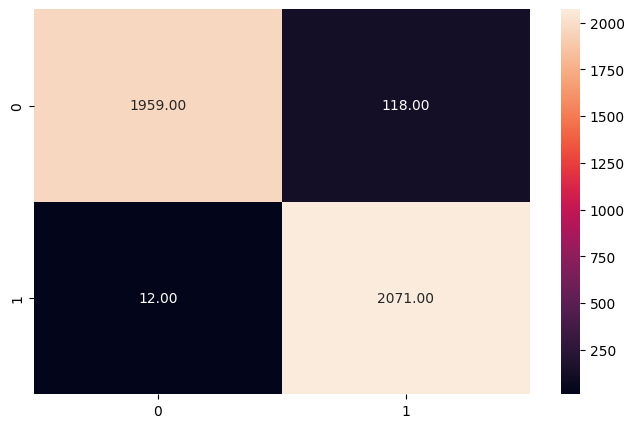

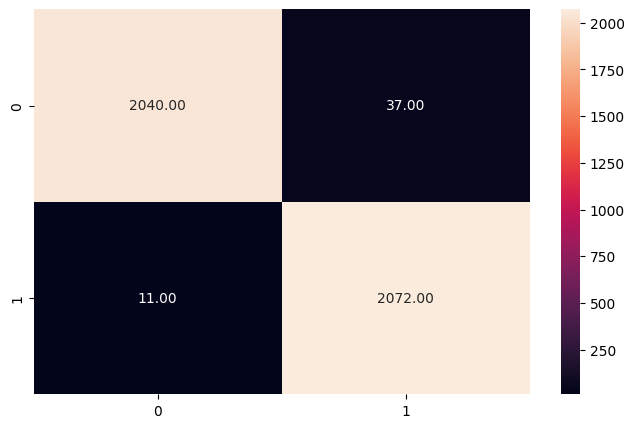

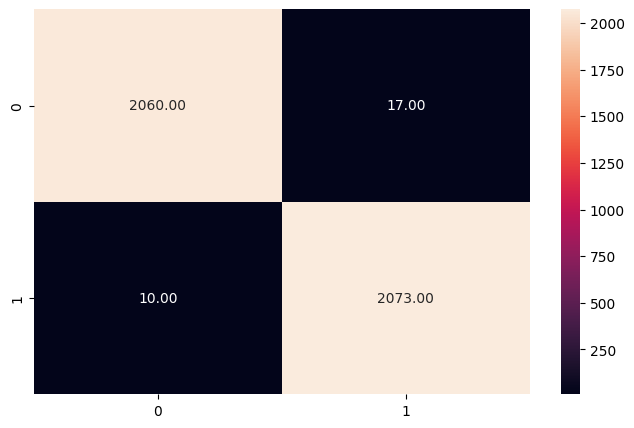

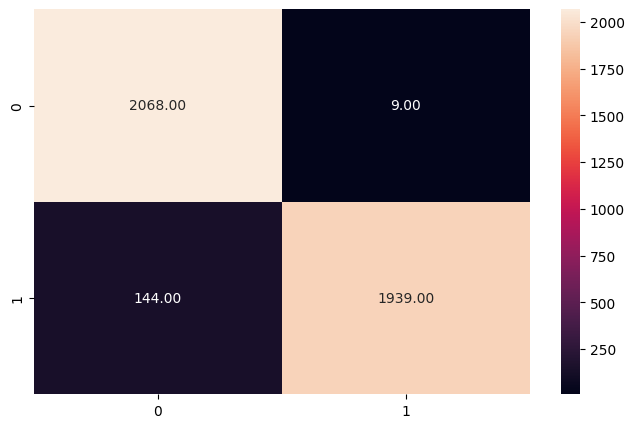

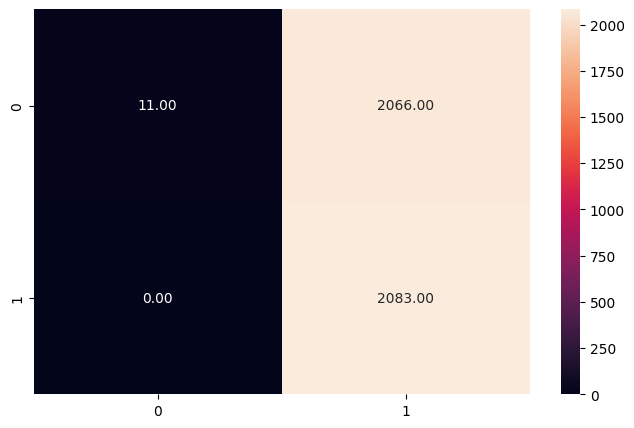

In [29]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    kfolds(model, model_name)
    model.fit(X_train, Y_train)
    model_train_score = model.score(X_train, Y_train)
    model_test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")
    conf_matrix(model)
    class_report(model)



Taking user input to check the accuracy of the models

In [30]:
import re
def preprocess_input(title, author, content):
    # Combine title, author, and content into one string
    input_text = f"{title} {author} {content}"
    stemmer = PorterStemmer()
    # Apply stemming, lowercase, and remove stopwords
    stemmed_input = re.sub('[^a-zA-Z]', ' ', input_text)
    stemmed_input = stemmed_input.lower()
    stemmed_input = stemmed_input.split()
    stemmed_input = [stemmer.stem(word) for word in stemmed_input if not word in stopwords.words('english')]
    stemmed_input = ' '.join(stemmed_input)

    return stemmed_input

# User input
user_title = input("Enter the title of the news: ")
user_author = input("Enter the author of the news: ")
user_content = input("Enter the content of the news: ")

# Preprocess the user input
preprocessed_input = preprocess_input(user_title, user_author, user_content)

# Vectorize the input
user_counts = count_vectorizer.transform([preprocessed_input])
user_tfidf = transformer.fit_transform(user_counts)

# Make predictions
for model_name, model in models.items():
    prediction = model.predict(user_tfidf)
    print(f"Prediction using {model_name}: {'Reliable' if prediction[0] == 1 else 'Unreliable'}")

Enter the title of the news: Russian warships ready to strike terrorists near Aleppo
Enter the author of the news: 
Enter the content of the news: Russian warships ready to strike terrorists near Aleppo 08.11.2016 | Source: Source: Mil.ru Attack aircraft of the Russian aircraft carrier Admiral Kuznetsov get ready to strike terrorists' positions in the vicinity of Aleppo, sources at the Russian Defense Ministry said, RBC reports. "Insurgents' attempts to break into Aleppo from outside are meaningless," the source said. The main task of the aircraft carrier aviation group is to strike missile and air blows on the terrorists , whose goal is to enter Aleppo. "After the attacks on terrorists' positions, one will have to forget about the support for insurgents from the outside," the source said. The Russian group in the Mediterranean Sea consists of the Admiral Kuznetsov aircraft carrier , the heavy nuclear missile cruiser Pyotr Velikiy (Peter the Great) and large anti-submarine ships Severo

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1682: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1
